# Project Tape-out

Your name: Mina Abdelmaseeh

# Design Idea : 1D photonic LIDAR
<center><img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41598-022-23456-7/MediaObjects/41598_2022_23456_Fig1_HTML.png?as=webp" width=500 height=500 /></center>

reference link : https://www.nature.com/articles/s41598-022-23456-7

## The idea is to generate a passive optical phased array:
 Input light is equally splitted into 4 lines using a splitter tree of 1X2 MMIs, where each line has a spiral delay line of lengths (L, 2L, 3L, 4L).
### So By changing the input freuqnecy :
1- the phase difference between adjacent lines is equal for all lines \
2- the phase difference changes by changing frequency 
##### This results into a beam steering of the output beam by changing the input frequency, while the photonic circuit is purely passive.

# Measuring
Since we can't measure phase difference, we will add extra components to make sure the circuit is working as intended. \
Each line is connected to a 1X2 MMI to split the power equally into two ports. \
Then, A 2x2 MMI (acts as a combiner) is placed between adjacent lines to convert the phase difference into power measurement (similar to MZI operation)
#### We can measure the following from this chip:
##### - the phase differnce betweeen adjacent lines 
##### - the power of each line can be infered from the power measurements of the MZIs as follows:
- The 1st and 4th line power can be directly measured from the 1X2 MMI splitter
- By summing the power of the 2 ports of the 2x2 combiner between the lines (1,2) & (3,4) we can infer the power of (line1 + line2) &(line 3 + line 4).
- we can then infer the power of line 2 & lines 3 from the obtained results
# Expectations
- Power of each line should be equal
- the power representing phase difference should be equal for all interferometers
- The power representing phase difference should change by changing input frequency


# Technology

We use the **PRG 2-Layer E-beam** PDK. 

In [28]:
%matplotlib widget
import set_paths 
from prg_ebeam_2L import technology
import all_utils
import ipkiss3.all as i3  # import ipkiss 
from prg_ebeam_2L import all as pdk
import numpy as np
import pylab as plt

# Design Capture

Build a circuit. explain your choice of building blocks and circuit topology.

80.00000000000006


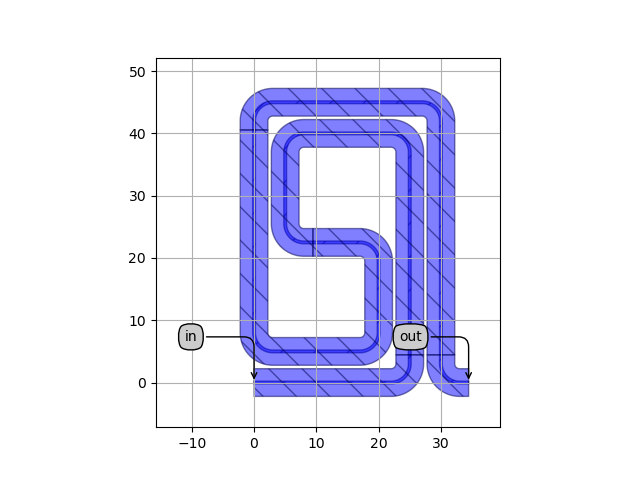

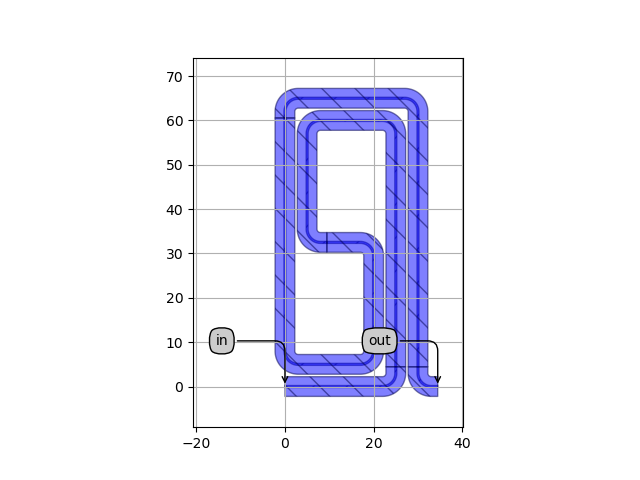

In [29]:
from picazzo3.wg.spirals import FixedLengthSpiralRounded
from picazzo3.wg.spirals.cell import DoubleSpiralWithInCouplingRounded


cell = DoubleSpiralWithInCouplingRounded(n_o_loops = 1, trace_template=pdk.PRG_WG450())
layout = cell.Layout(inner_size=(30.0,40.0),
                     incoupling_length=0.0,
                     bend_radius=3.0,
                     manhattan=False,
                     spacing=5.0)
cell2 = DoubleSpiralWithInCouplingRounded(n_o_loops = 1, trace_template=pdk.PRG_WG450())
layout2 = cell2.Layout(inner_size=(30.0,60.0),
                     incoupling_length=0.0,
                     bend_radius=3.0,
                     manhattan=False,
                     spacing=5.0)
# Checking if the trace length is indeed correct
print(layout2.trace_length()-layout.trace_length())
#print(layout2.trace_length())
layout.visualize(annotate=True)
layout2.visualize(annotate=True)

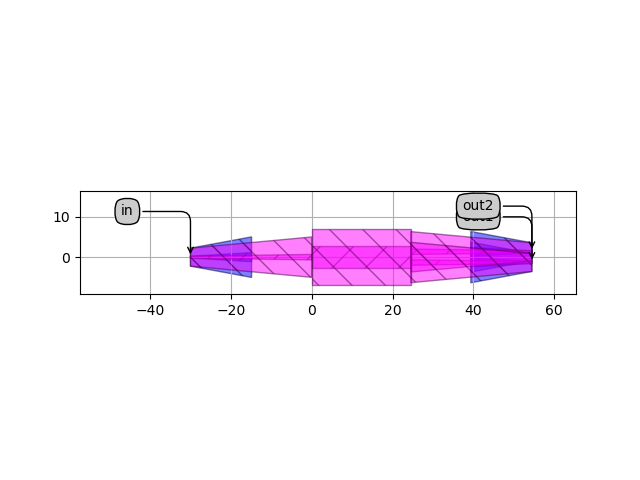

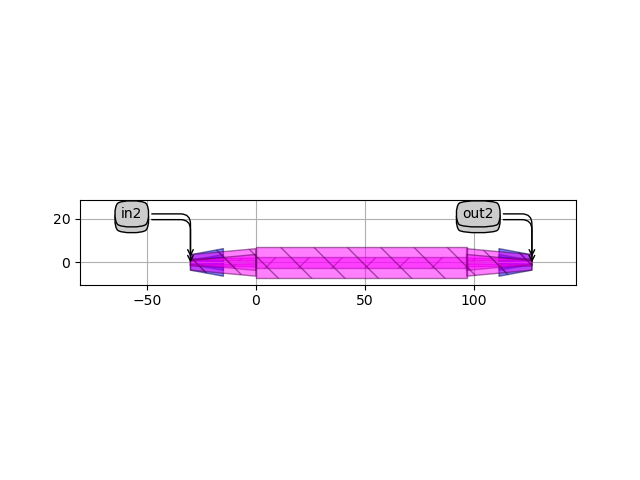

241.57138740012311 281.5713874001229 321.57138740012294 361.571387400123


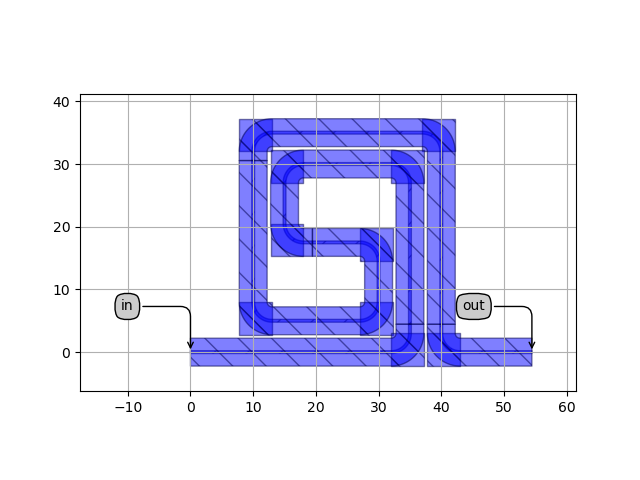

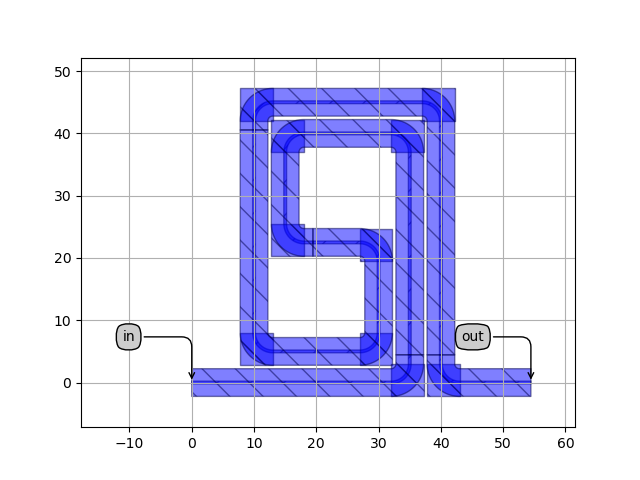

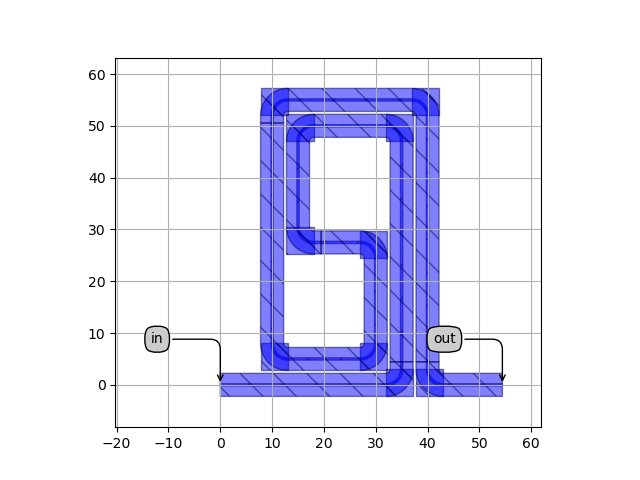

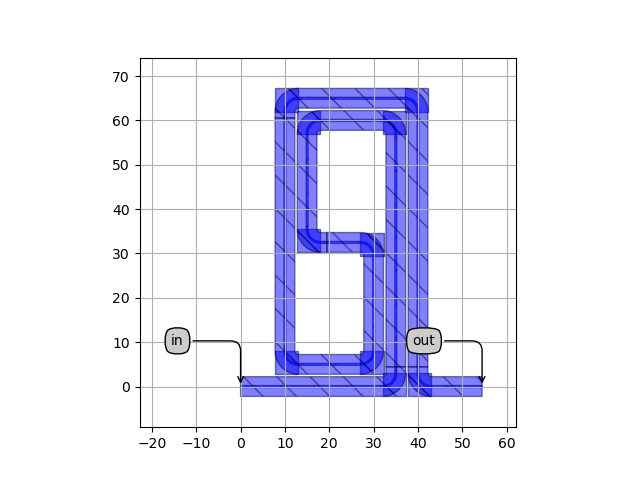

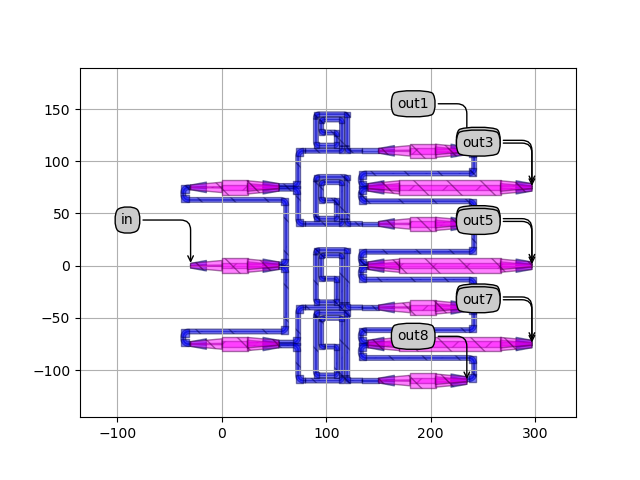

In [30]:
from routing import AutoPlaceAndConnect
from picazzo3.wg.spirals import FixedLengthSpiralRounded
from picazzo3.wg.spirals.cell import DoubleSpiralWithInCouplingRounded

splitter_wire = pdk.PRG_MMI_1X2_WIRE()
splitter_wire.Layout().visualize(annotate=True)

interference_wire = pdk.PRG_MMI_2X2_WIRE()
interference_wire.Layout().visualize(annotate=True)

delay  = DoubleSpiralWithInCouplingRounded(n_o_loops = 1, trace_template=pdk.PRG_WG450())
delay2 = DoubleSpiralWithInCouplingRounded(n_o_loops = 1, trace_template=pdk.PRG_WG450())
delay3 = DoubleSpiralWithInCouplingRounded(n_o_loops = 1, trace_template=pdk.PRG_WG450())
delay4 = DoubleSpiralWithInCouplingRounded(n_o_loops = 1, trace_template=pdk.PRG_WG450())

delay_layout1 = delay.Layout(inner_size=(30.0,30.0),
                             incoupling_length=10.0,
                             bend_radius=3.0,
                             manhattan=False,
                             spacing=5.0)
delay_layout2 = delay2.Layout(inner_size=(30.0,40.0),
                             incoupling_length=10.0,
                             bend_radius=3.0,
                             manhattan=False,
                             spacing=5.0)
delay_layout3 = delay3.Layout(inner_size=(30.0,50.0),
                             incoupling_length=10.0,
                             bend_radius=3.0,
                             manhattan=False,
                             spacing=5.0)
delay_layout4 = delay4.Layout(inner_size=(30.0,60.0),
                             incoupling_length=10.0,
                             bend_radius=3.0,
                             manhattan=False,
                             spacing=5.0)
print(delay_layout1.trace_length(), delay_layout2.trace_length(), delay_layout3.trace_length() , delay_layout4.trace_length() )
delay_layout1.manhattan = True
delay_layout2.manhattan = True
delay_layout3.manhattan = True
delay_layout4.manhattan = True

delay_layout1.visualize(annotate=True)
delay_layout2.visualize(annotate=True)
delay_layout3.visualize(annotate=True)
delay_layout4.visualize(annotate=True)

class SplitterTree(AutoPlaceAndConnect):
    
    child_cells = i3.LockedProperty()
    links = i3.LockedProperty()
    external_port_names = i3.LockedProperty()

    def _default_child_cells(self):
            return {"splitter_1"   : splitter_wire,
                    "splitter_1_1" : splitter_wire,
                    "splitter_1_2" : splitter_wire,
                    "delay_1": delay,
                    "delay_2": delay2,
                    "delay_3": delay3,
                    "delay_4": delay4,
                    "splitter_after_delay_1": splitter_wire,
                    "splitter_after_delay_2": splitter_wire,
                    "splitter_after_delay_3": splitter_wire,
                    "splitter_after_delay_4": splitter_wire,

                    "Interference1": interference_wire,
                    "Interference2": interference_wire,
                    "Interference3": interference_wire,

                    
                   }

    def _default_links(self):
        return [("splitter_1:out1", "splitter_1_1:in"),
                ("splitter_1:out2", "splitter_1_2:in"),
                ("splitter_1_1:out2", "delay_1:in"),
                ("splitter_1_1:out1", "delay_2:in"),
                ("splitter_1_2:out2", "delay_3:in"),
                ("splitter_1_2:out1", "delay_4:in"),
                ("splitter_after_delay_1:in","delay_1:out"),
                ("splitter_after_delay_2:in","delay_2:out"),
                ("splitter_after_delay_3:in","delay_3:out"),
                ("splitter_after_delay_4:in","delay_4:out"),
                
                ('splitter_after_delay_1:out1','Interference1:in2'),
                ("splitter_after_delay_2:out2","Interference1:in1"),
                
                ("splitter_after_delay_2:out1","Interference2:in2"),
                ("splitter_after_delay_3:out2","Interference2:in1"),

                ("splitter_after_delay_3:out1","Interference3:in2"),
                ("splitter_after_delay_4:out2","Interference3:in1"),

               ]

    def _default_external_port_names(self):
        return {"splitter_1:in": "in",
                "splitter_after_delay_1:out2": "out1",
                "Interference1:out2": "out2",
                "Interference1:out1": "out3",
                "Interference2:out2": "out4",
                "Interference2:out1": "out5",

                "Interference3:out2": "out6",
                "Interference3:out1": "out7",
                "splitter_after_delay_4:out1": "out8",
               }
    class Layout(i3.LayoutView):
        def _generate_instances(self, insts):
            insts += i3.place_and_route(
                insts={
                    "splitter_1"   : splitter_wire,
                    "splitter_1_1" : splitter_wire,
                    "splitter_1_2" : splitter_wire,
                    "delay_1":  delay,
                    "delay_2": delay2,
                    "delay_3": delay3,
                    "delay_4": delay4,
                    "splitter_after_delay_1":splitter_wire,
                    "splitter_after_delay_2":splitter_wire,
                    "splitter_after_delay_3":splitter_wire,
                    "splitter_after_delay_4":splitter_wire,

                    "Interference1": interference_wire,
                    "Interference2": interference_wire,
                    "Interference3": interference_wire,


                },
                specs=[
                    i3.Place('splitter_1', (0, 0)),
                    i3.PlaceRelative('splitter_1_1', 'splitter_1', (0, 75)),
                    i3.PlaceRelative('splitter_1_2', 'splitter_1', (0, -75)),
                    i3.PlaceRelative('delay_1', 'splitter_1_1', (80, 35),),
                    i3.PlaceRelative('delay_2', 'splitter_1_1', (80, -35)),
                    i3.PlaceRelative('delay_3', 'splitter_1_2', (80, 35)),
                    i3.PlaceRelative('delay_4', 'splitter_1_2', (80, -35)),
                    
                    i3.PlaceRelative('splitter_after_delay_1', 'delay_1', (100,0)),
                    i3.PlaceRelative('splitter_after_delay_2', 'delay_2', (100, 0)),
                    i3.PlaceRelative('splitter_after_delay_3', 'delay_3', (100, 0)),
                    i3.PlaceRelative('splitter_after_delay_4', 'delay_4', (100, 0)),


                    i3.PlaceRelative('Interference1', 'splitter_after_delay_1', (-10,-35)),
                    i3.PlaceRelative('Interference2', 'splitter_after_delay_2', (-10, -40)),
                    i3.PlaceRelative('Interference3', 'splitter_after_delay_3', (-10, -35)),

                    
                    i3.ConnectManhattan('splitter_1:out2',
                                       'splitter_1_1:in',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),
                    i3.ConnectManhattan('splitter_1:out1',
                                       'splitter_1_2:in',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),
                    i3.ConnectManhattan('splitter_1_1:out2',
                                       'delay_1:in',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),       
                    i3.ConnectManhattan('splitter_1_1:out1',
                                       'delay_2:in',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),       
                    i3.ConnectManhattan('splitter_1_2:out2',
                                       'delay_3:in',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),       
                    i3.ConnectManhattan('splitter_1_2:out1',
                                       'delay_4:in',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),
                    
                    i3.ConnectManhattan('splitter_after_delay_1:in',
                                       'delay_1:out',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_2:in',
                                       'delay_2:out',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_3:in',
                                       'delay_3:out',
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_4:in',
                                       'delay_4:out',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  


                    i3.ConnectManhattan('splitter_after_delay_1:out1',
                                       'Interference1:in2',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_2:out2',
                                       'Interference1:in1',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_2:out1',
                                       'Interference2:in2',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_3:out2',
                                       'Interference2:in1',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                     i3.ConnectManhattan('splitter_after_delay_3:out1',
                                       'Interference3:in2',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),  
                    i3.ConnectManhattan('splitter_after_delay_4:out2',
                                       'Interference3:in1',
                                        manhattan=True,
                                       #control_points=[i3.H(50)],
                                        bend_radius=5.0),                                 
                ]
            )
            return insts

        def _generate_ports(self, ports):
            ports += i3.expose_ports(self.instances, {'splitter_1:in': 'in' ,
                                                      'splitter_after_delay_1:out2': 'out1',
                                                      'Interference1:out2': 'out2','Interference1:out1': 'out3',
                                                      'Interference2:out2': 'out4','Interference2:out1': 'out5',
                                                      'Interference3:out2': 'out6','Interference3:out1': 'out7',
                                                      'splitter_after_delay_4:out1': 'out8' })
            return ports
splitter_tree_test = SplitterTree()
splitter_tree_test_lo = splitter_tree_test.Layout()
splitter_tree_test_lo_flat = splitter_tree_test_lo.flat_copy()
splitter_tree_test_lo_flat.manhattan = True
splitter_tree_test_lo_flat.visualize(annotate=True)

# Simulate the circuit

Check your circuit behaviour. Choose your parameters.
document your choices.

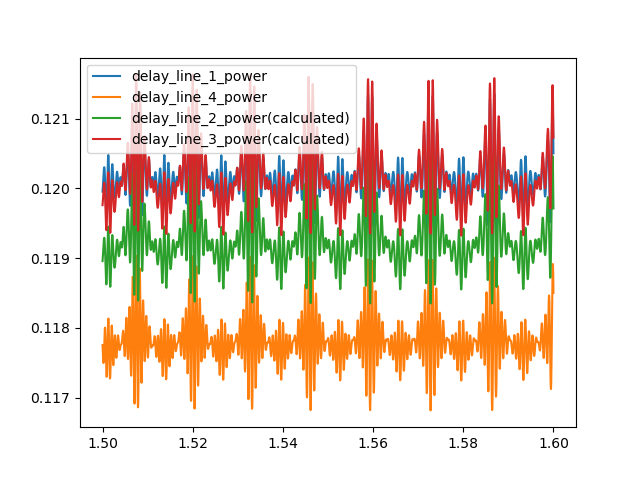

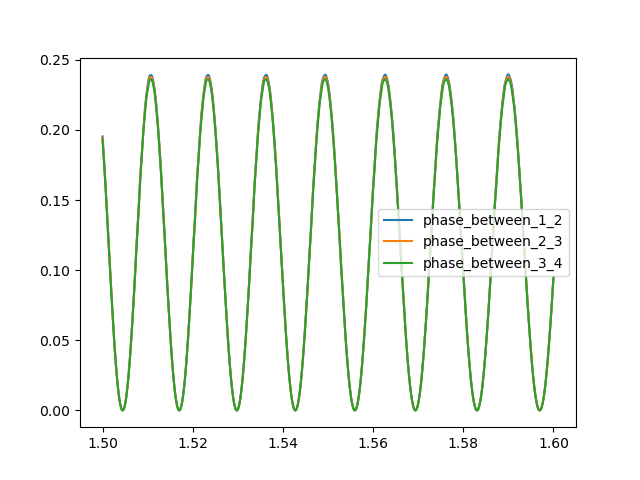

In [33]:
splitter_tree_model = splitter_tree_test.CircuitModel()
#wavelengths = np.linspace(1.548, 1.552, 2001)
wavelengths = np.linspace(1.5, 1.6, 2001)

S = splitter_tree_model.get_smatrix(wavelengths)
#print(S["in","out1"])
plt.figure()
plt.plot(wavelengths, np.abs(S["in", "out1"])**2,label="delay_line_1_power")
plt.plot(wavelengths, np.abs(S["in", "out8"])**2,label="delay_line_4_power")

plt.plot(wavelengths, np.abs(S["in", "out2"])**2 + np.abs(S["in", "out3"])**2 - np.abs(S["in", "out1"])**2,label="delay_line_2_power(calculated)")
plt.plot(wavelengths, np.abs(S["in", "out4"])**2 + np.abs(S["in", "out5"])**2 - np.abs(S["in", "out8"])**2,label="delay_line_3_power(calculated)")

plt.legend()


plt.figure()
plt.plot(wavelengths, np.abs(S["in", "out2"])**2,label="phase_between_1_2")
plt.plot(wavelengths, np.abs(S["in", "out4"])**2,label="phase_between_2_3")
plt.plot(wavelengths, np.abs(S["in", "out6"])**2,label="phase_between_3_4")

plt.legend()
#plt.subplot(4,1,3)
#plt.plot(wavelengths, np.abs(S["in", "out8"])**2)
#plt.show()
#plt.xlabel("wavelength")
#plt.ylabel("phase")


# Comments on Circuit simulation
- The power splitting is approximately equal 0.1190 +/- 1%
-  Phase difference between adjacent lines is equal

# Organize the layout

Layout is already organized

# Make a frame

The frame can have up to 8 grating couplers on both sides. Don't place more couplers than necessary. 

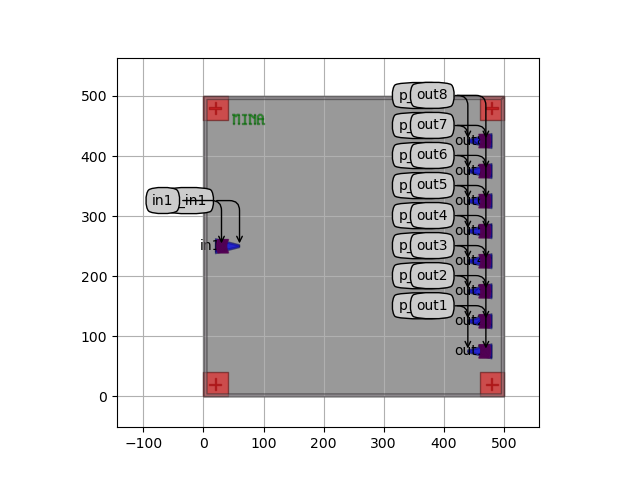

In [11]:
my_frame = pdk.PRG_FIBER_FRAME_8(name="my_frame",  #give all your components a good name. This is not a good name!
                                 title="Mina",
                                 owner="Mina",
                                 n_inputs=1,
                                 n_outputs=8)
my_frame_lo = my_frame.Layout()
my_frame_lo.visualize(annotate=True)

# Put the circuit in the frame

connect your circuit element in a frame. Add alignment waveguides or component tests if needed.

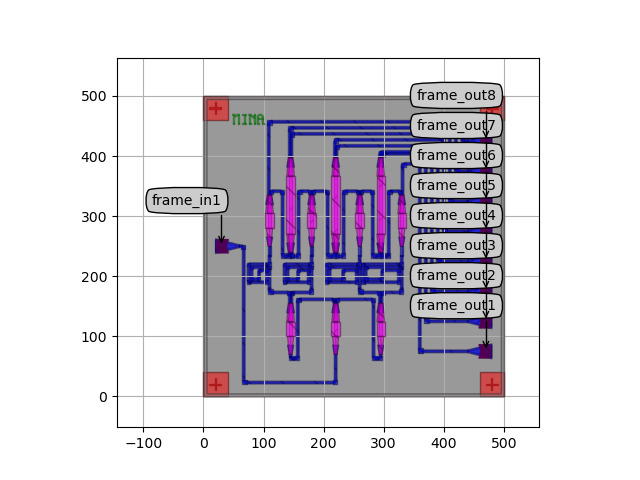

In [21]:
from routing import PlaceAndAutoRoute
my_circuit = SplitterTree()

# only 2 cells: the circuit and the frame
child_cells = {"circuit": my_circuit,
               "frame": my_frame}

# connect your circuit ports to the on-chip ports of the frame
links = [("circuit:in", "frame:p_in1"),
         ("circuit:out1", "frame:p_out8"),
         ("circuit:out2", "frame:p_out7"),
         ("circuit:out3", "frame:p_out6"),
         ("circuit:out4", "frame:p_out5"),
         ("circuit:out5", "frame:p_out4"),
         ("circuit:out6", "frame:p_out3"),
         ("circuit:out7", "frame:p_out2"),
         ("circuit:out8", "frame:p_out1"),
         
         #("frame:p_out5", "frame:p_in2")
        ] # alignment waveguide: optional

external_port_names = {"frame:in1": "in1",
                       #"frame:in2": "in2",
                       "frame:out1": "out8",
                       "frame:out2": "out7",
                       "frame:out3": "out6",
                       "frame:out4": "out5",
                       "frame:out5": "out4",
                       "frame:out6": "out3",
                       "frame:out7": "out2",
                       "frame:out8": "out1",
                      }

# place the circuit. Leave the frame at 0,0
my_chip = i3.Circuit(
    insts={
        'circuit': my_circuit,
        'frame': my_frame,
    },
#    exposed_ports={"in1":"frame:p_in_1",
#                   "out1":"frame:p_out1",
#                   "out2":"frame:p_out2",
#                   "out3":"frame:p_out3",
#                   "out4":"frame:p_out4",
#                   "out5":"frame:p_out5",
#                   "out6":"frame:p_out6",
#                   "out7":"frame:p_out7",
#                   "out8":"frame:p_out8",
#                  },
    specs=[
        i3.Place('frame', position=(0, 0)),
        i3.Place('circuit', position=(220, 100), angle=90),

        i3.ConnectManhattan(
            'frame:p_in1', 'circuit:in',
            manhattan=True,
            control_points=[(67,30)],
        ),
        i3.ConnectManhattan(
            'frame:p_out8', 'circuit:out1',
            manhattan=True,
            control_points=[(430,450)],
        ),
        i3.ConnectManhattan(
            'frame:p_out7', 'circuit:out2',
            manhattan=True,
            control_points=[(420,440)],
        ),
        i3.ConnectManhattan(
            'frame:p_out6', 'circuit:out3',
            manhattan=True,
            control_points=[(410,430)],
        ),
        i3.ConnectManhattan(
            'frame:p_out5', 'circuit:out4',
            manhattan=True,
            control_points=[(400,420)],
        ),
        i3.ConnectManhattan(
            'frame:p_out4', 'circuit:out5',
            manhattan=True,
            control_points=[(390,410)],
        ),
        i3.ConnectManhattan(
            'frame:p_out3', 'circuit:out6',
            manhattan=True,
            control_points=[(380,400)],
        ),
        i3.ConnectManhattan(
            'frame:p_out2', 'circuit:out7',
            manhattan=True,
            control_points=[(370,390)],
        ),
        i3.ConnectManhattan(
            'frame:p_out1', 'circuit:out8',
            manhattan=True,
            control_points=[(360,380)],
        ),
    ]
    
)
my_chip_layout = my_chip.Layout()
my_chip_layout.visualize(annotate=True)

# Resimulate

Resimulate the circuit. You should get the same response, but with the curve of the grating couplers superimposed.

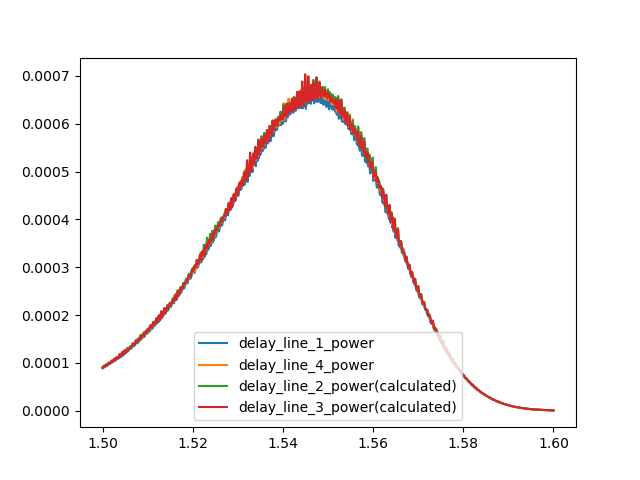

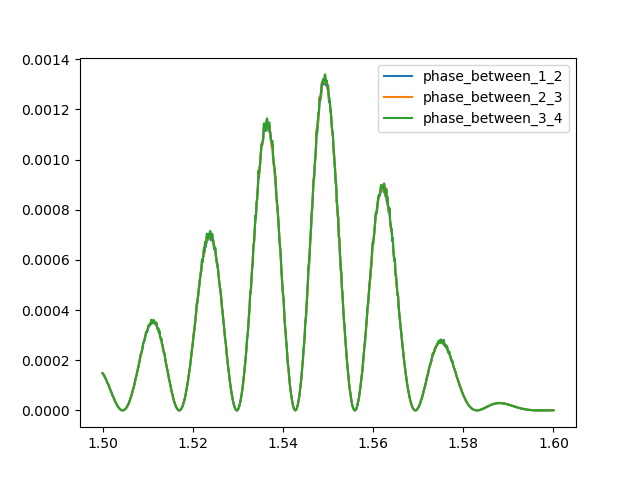

In [26]:
my_chip_model = my_chip.CircuitModel()
#wavelengths = np.linspace(1.548, 1.552, 2001)
wavelengths = np.linspace(1.5, 1.6, 2001)

S = my_chip_model.get_smatrix(wavelengths)

plt.figure()
plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out1"])**2,label="delay_line_1_power")
plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out8"])**2,label="delay_line_4_power")

plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out2"])**2 + np.abs(S["frame_in1", "frame_out3"])**2 - np.abs(S["frame_in1", "frame_out1"])**2,label="delay_line_2_power(calculated)")
plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out4"])**2 + np.abs(S["frame_in1", "frame_out5"])**2 - np.abs(S["frame_in1", "frame_out8"])**2,label="delay_line_3_power(calculated)")

plt.legend()


plt.figure()
plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out3"])**2,label="phase_between_1_2")
plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out5"])**2,label="phase_between_2_3")
plt.plot(wavelengths, np.abs(S["frame_in1", "frame_out7"])**2,label="phase_between_3_4")

plt.legend()



# Comments on Chip simulation results
- power splitting is equal for all lines
- phase difference is equal between adjacent lines
- The frequency dependence of the gratting coupler is visible in both power splitting curve and phase difference curve

# Design Rule Check

Run the DRC check. 

If the DRC returns errors, try to fix them. You can always send a subcircuit to the DRC process to see where the exact problem is. You can:

- perform explicit grid snapping
- flatten non-orthogonal references
- add `manhattan` blocks to wavegudie bends.

In [23]:
# find the DRC file. It is located relative to the Technology deck

import os
technology.__file__
pdk_path = os.path.abspath(os.path.join(os.path.split(technology.__file__)[0],
                                        "../../../"))
calibre_drc_deck = os.path.join(pdk_path, "drc", "prg_ebeam_2L_drc_deck.cal")

Set up the DRC connection

In [15]:
from calibre_wrapper import DrcDeckFromFile
drc_deck = DrcDeckFromFile(filenames=[calibre_drc_deck])

from calibre_server.client import CalibreClient

# connect to the calibre server
qc = CalibreClient('http://wsmaredsous.intec.ugent.be:8123/calibre', 
                   polling_interval=1.0, 
                   verbose=True)

Run the DRC check

In [16]:
drc_results = qc.drc_pcell(my_chip_layout, drc_deck, keep_output_files=True)
print("DRC generated", len(drc_results), "results.")


Job <1400> is in the queue

Generated 4 output files

/svr/datavolume/users/msc_01/notebooks/my_project_PRG/_pcell_20_for_calibre.gds

/svr/datavolume/users/msc_01/notebooks/my_project_PRG/_pcell_20_drc.out

/svr/datavolume/users/msc_01/notebooks/my_project_PRG/_pcell_20_drc.sum

/svr/datavolume/users/msc_01/notebooks/my_project_PRG/_pcell_20_drc.ascii

DRC generated 0 results.


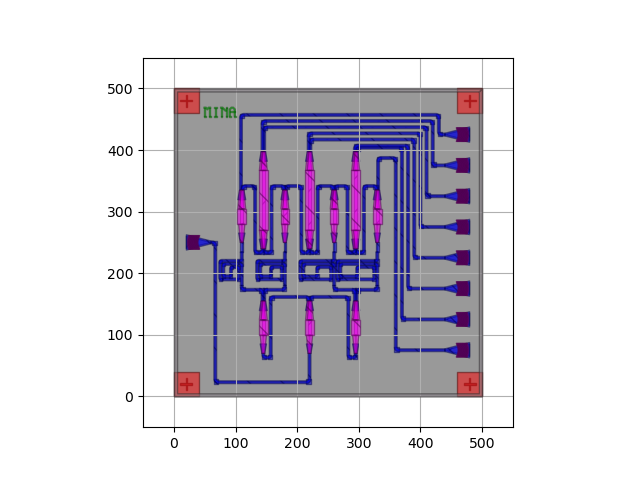

In [17]:
drc_layout = my_chip.DrcLayout(drc_results=drc_results)
drc_layout.visualize()

### Layout OK, No DRC errors!

# Save the Design

Save the DRC-clean layout to disk.

In [206]:
my_chip_layout.write_gdsii('my_chip.gds')

/svr/datavolume/users/msc_01/notebooks/my_project_PRG/my_chip.gds

# Submit your design

To facilitate the submission, use the following set of commands to submit the design. The design will be automatically uploaded to our submission server and versioned. You can submit designs all the way till the deadline.

In [207]:
from ccrate.client import CcrateClient
cc = CcrateClient(server_url='http://wsmaredsous.intec.ugent.be:1919/ccrate',
                  project="pic2023_prg")  # make sure you submit to the right project
cc.ping() # Test connectivity to the server

Ping Successful


True

To submit your design all you have to do is to use the **submit_gds** function and pass the the gds file name:

In [208]:
# the line below is commented out. Uncomment it to submit the design

cc.submit_gds('my_chip.gds', comment='Add any comment you want')

'File successfully submitted'

# Fabricated Chip
![Microscope image of the fabricated chip](data_edited/figures/field_2_2.jpg)


# Analyze data

## Phase Difference

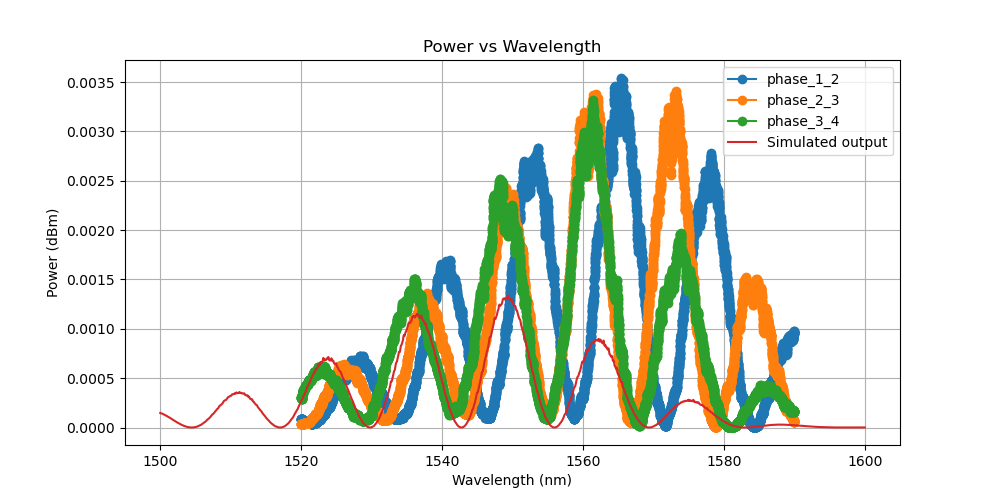

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))

# Output port 0
data_1_2 = pd.read_csv('data_edited/msc_01.0_L00_R01.csv')
wavelength = data_1_2['wavelength']
power_1_2 = data_1_2['power']
plt.plot(wavelength, 10**(np.array(power_1_2)/10), marker='o', linestyle='-',label='MZI_1_2')

# Output port 7
data_2_3 = pd.read_csv('data_edited/msc_01.0_L00_R03.csv')
wavelength = data_2_3['wavelength']
power_2_3 = data_2_3['power']
plt.plot(wavelength, 10**(np.array(power_2_3)/10), marker='o', linestyle='-', label='MZI_2_3')

# Output port 7
data_3_4 = pd.read_csv('data_edited/msc_01.0_L00_R05.csv')
wavelength = data_3_4['wavelength']
power_3_4 = data_3_4['power']
plt.plot(wavelength, 10**(np.array(power_3_4)/10), marker='o', linestyle='-', label='MZI_3_4')


my_chip_model = my_chip.CircuitModel()
#wavelengths = np.linspace(1.548, 1.552, 2001)
wavelengths = np.linspace(1.5, 1.6, 2001)

S = my_chip_model.get_smatrix(wavelengths)

#plt.figure()
plt.plot(wavelengths*1000, np.abs(S["frame_in1", "frame_out3"])**2,label="Simulated output")
#plt.plot(wavelengths*1000, np.abs(S["frame_in1", "frame_out5"])**2,label="phase_between_2_3 **Simulated**")
#plt.plot(wavelengths*1000, np.abs(S["frame_in1", "frame_out7"])**2,label="phase_between_3_4 **Simulated**")


plt.title('Power vs Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (dBm)')
plt.legend()
plt.grid(True)
plt.show()



### Comments on the figure
The measured power of the MZIs (The interference between adjacent delay lines acts as a way to measure the phase difference) shows a consistent results with the expected output from the simulation of the layout for MZI between delay lines (2&3) and delay lines (3&4).\
However, for the MZI between delay lines (1&2) shows an inconsistent results with the simulation.
### Comments on the phase of delay lines
It is clear from the figure that the phase difference between delay line 2 & 3 ($\Delta \phi_{2,3}$) is equal to the phase difference between delay line 3&4 ($\Delta \phi_{3,4}$). However $\Delta \phi_{1,2}$ is different (around 90 degrees lower than $\Delta \phi_{2,3}$ & $\Delta \phi_{3,4}$).

## Power distribution
In this part the output power of each delay line is measured.\
For a functioning operation of the phased array, the power distribution should be equal for all delay lines as shown in the simulations done previously.

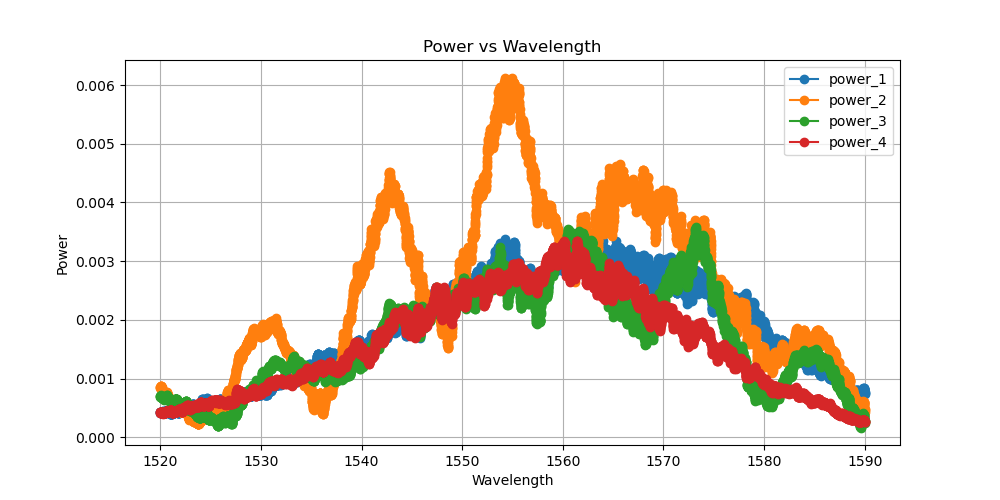

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))

# Output port 0
data_0 = pd.read_csv('data_edited/msc_01.0_L00_R00.csv')
wavelength = data_0['wavelength']
power_0 = data_0['power']

data_1 = pd.read_csv('data_edited/msc_01.0_L00_R01.csv')
power_1 = data_1['power']

data_2 = pd.read_csv('data_edited/msc_01.0_L00_R02.csv')
power_2 = data_2['power']

data_3 = pd.read_csv('data_edited/msc_01.0_L00_R03.csv')
power_3 = data_3['power']

data_4 = pd.read_csv('data_edited/msc_01.0_L00_R04.csv')
power_4 = data_4['power']

data_5 = pd.read_csv('data_edited/msc_01.0_L00_R05.csv')
power_5 = data_5['power']

data_6 = pd.read_csv('data_edited/msc_01.0_L00_R06.csv')
power_6 = data_6['power']

data_7 = pd.read_csv('data_edited/msc_01.0_L00_R07.csv')
power_7 = data_7['power']

data_2 = pd.read_csv('data_edited/msc_01.0_L00_R00.csv')
power_2 = data_2['power']

data_3 = pd.read_csv('data_edited/msc_01.0_L00_R00.csv')
power_3 = data_3['power']
data_0 = pd.read_csv('data_edited/msc_01.0_L00_R00.csv')


I_1 = (10**(power_1/10)+10**(power_2/10))
I_2 = (10**(power_3/10)+10**(power_4/10))
I_3 = (10**(power_5/10)+10**(power_6/10))

plt.plot(wavelength, 10**np.array(power_0/10), marker='o', linestyle='-',label='power_1')
plt.plot(wavelength, 10**np.array(power_7/10)-(I_3-I_2), marker='o', linestyle='-', label='power_2')
plt.plot(wavelength, 10**np.array(power_0/10)-(I_1-I_2), marker='o', linestyle='-', label='power_3')
plt.plot(wavelength, 10**np.array(power_7/10), marker='o', linestyle='-', label='power_4')

#plt.plot(wavelength, ((I_1+I_2-I_3)-10**np.array(power_0/10)+10**np.array(power_7/10))/2, marker='o', linestyle='-', label='power_delay_line_3')

#plt.plot(wavelength, 10**(power_1/10)+10**(power_2/10)-10**np.array(power_1/10), marker='o', linestyle='-', label='power_delay_line_2')


plt.title('Power vs Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()



### Comments on power distribution

From the figure it is clear that power is distributed evenly among different delay lines.

- Power for delay lines 1 & 4 are measured directly through ports 0 & 7.
- Power through delay line 3 is extracted by the following relation:
  $$P_3 = P_1 - (MZI_1 - MZI_2)$$
  where:
  - $MZI_1$, $MZI_2$ are the total powers of the MZI between delay lines (1&2), (2&3) respectively.
  
  This way reduces the fluctuation in the signal and gives better extraction for the power going through line 3.

- Power through delay line 2 has a higher value due to errors while inferring the signal from the available data.


# Conclusion

- The power was found to be evenly split among all four delay lines.
- Phase differences between lines (2, 3, 4) were observed to be equal and changed periodically by varying the wavelength of the input light.
- The phase difference between lines (1, 2) was approximately 90 degrees, which is an unexpected result. This 90-degree phase shift may have arisen from phase noise acquired during the signal's propagation through a long waveguide.


# Document your design

To make sure that you still know what you intended by the time the chip arrives, write some documentation about your design

- clean up the notebook
- add some additional pictures with explanations
- write instructions for yourself on how you would analyse the measurement results.